## Dimensionality reduction

We will test some of the dimensionality reduction techniques on the [UFO dataset](https://drive.google.com/file/d/0B2gZvn36c5CmRTJpS3pkUllmX1U/view?usp=sharing) from the last week.




### PCA

Subset all **weather related** features from the data and run PCA over it. 


1. Extract the 2 best principal components (k=2). 
1. Plot the **feature** space into the new space. 
    - We should create a scatter plot with 1st component on the axis x and second component on y. 
    - The length of each component is equal to number of columns (features) we have in our data before PCA.
    - Points in the graph that are close to each other are similar features. We need to anotate the points with feature names.
1. Observe which features have similar meaning and which have opposite.
    - Features close to each other have similar meaning.
1. Select the optimal number of dimensions to keep - *k* (find the explained variance of each component and use the elbow rule)
1. Create a projection of your data into the *k* axes of the trained PCA
1. Export the data with the new features. Number of rows should be the same as in the original dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('UFO_data.csv',sep=';',index_col='Unnamed: 0')

C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (20,23,26,38) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_train.head()

,timestamp,city,state,country,shape,duration_seconds,duration_text,notes,date_reported,lat,...,windBearing,windBearingError,windSpeed,windSpeedError,ast_absolute_magnitude_h,ast_estimated_diameter,ast_is_dangerous,ast_miss_distance,ast_orbiting_body,ast_relative_velocity
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27 00:00:00,29.883056,...,154.0,NaN,4.89,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
1,1949-10-10 21:00:00,lackland afb,tx,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16 00:00:00,29.384210,...,135.0,NaN,6.60,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21 00:00:00,53.200000,...,NaN,NaN,NaN,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
3,1956-10-10 21:00:00,edna,tx,us,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17 00:00:00,28.978333,...,136.0,NaN,2.75,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22 00:00:00,21.418056,...,80.0,NaN,3.60,NaN,21.5,0.297879,True,42621696.0,Earth,13778.372043


In [4]:
df_train.columns

Index(['timestamp', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration_text', 'notes', 'date_reported', 'lat', 'lng', 'date_event',
       'apparentTemperature', 'cloudCover', 'cloudCoverError', 'dewPoint',
       'dewPointError', 'humidity', 'humidityError', 'icon', 'precipIntensity',
       'precipProbability', 'precipType', 'pressure', 'pressureError',
       'summary', 'temperature', 'temperatureError', 'time', 'visibility',
       'visibilityError', 'windBearing', 'windBearingError', 'windSpeed',
       'windSpeedError', 'ast_absolute_magnitude_h', 'ast_estimated_diameter',
       'ast_is_dangerous', 'ast_miss_distance', 'ast_orbiting_body',
       'ast_relative_velocity'],
      dtype='object')

In [7]:
df_weather = df_train[['duration_seconds','apparentTemperature','cloudCover','dewPoint','humidity','precipIntensity','precipProbability','precipType','pressure','temperature','visibility','windBearing','windSpeed']]

In [8]:
df_weather.head()

,duration_seconds,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,precipType,pressure,temperature,visibility,windBearing,windSpeed
0,2700.0,25.86,0.00,20.56,0.73,0.0,0.0,NaN,1009.05,25.86,16.09,154.0,4.89
1,7200.0,26.12,0.00,21.72,0.77,0.0,0.0,NaN,1008.81,26.12,16.09,135.0,6.60
2,20.0,15.56,0.75,12.86,0.84,NaN,NaN,rain,1019.00,15.56,2.90,NaN,NaN
3,20.0,22.68,0.12,17.04,0.71,NaN,NaN,rain,1020.64,22.68,16.09,136.0,2.75
4,900.0,25.74,0.63,21.47,0.77,NaN,NaN,rain,1015.33,25.74,16.09,80.0,3.60


In [9]:
df_weather.dtypes

duration_seconds       float64
apparentTemperature    float64
cloudCover             float64
dewPoint               float64
humidity               float64
precipIntensity        float64
precipProbability      float64
precipType              object
pressure               float64
temperature            float64
visibility             float64
windBearing            float64
windSpeed              float64
dtype: object

In [10]:
total = df_weather.isnull().sum().sort_values(ascending=False)
percent = (df_weather.isnull().sum()/df_weather.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
precipType,66599,0.829047
precipProbability,24498,0.304959
precipIntensity,24498,0.304959
pressure,16571,0.206281
cloudCover,16530,0.205771
windBearing,16039,0.199659
windSpeed,15982,0.198949
visibility,15739,0.195924
humidity,15624,0.194493
dewPoint,15624,0.194493


In [28]:
# precipType encoding
df_weather['rained'] = 0
for i in range(len(df_weather)):
    if df_weather.loc[i,'precipType'] == 'rain':
        df_weather.loc[i,'rained'] += 1
    elif df_weather.loc[i,'precipType'] == 'snow':
        df_weather.loc[i,'rained'] +=2

<ipython-input-28-78054a2ba300>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather['rained'] = 0


In [20]:
df_weather.head()

,duration_seconds,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,precipType,pressure,temperature,visibility,windBearing,windSpeed,rained
0,2700.0,25.86,0.00,20.56,0.73,0.0,0.0,NaN,1009.05,25.86,16.09,154.0,4.89,0
1,7200.0,26.12,0.00,21.72,0.77,0.0,0.0,NaN,1008.81,26.12,16.09,135.0,6.60,0
2,20.0,15.56,0.75,12.86,0.84,NaN,NaN,rain,1019.00,15.56,2.90,NaN,NaN,1
3,20.0,22.68,0.12,17.04,0.71,NaN,NaN,rain,1020.64,22.68,16.09,136.0,2.75,1
4,900.0,25.74,0.63,21.47,0.77,NaN,NaN,rain,1015.33,25.74,16.09,80.0,3.60,1


In [32]:
df_weather.drop(columns='precipType',inplace=True)

C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
df_weather.head()

,duration_seconds,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,windBearing,windSpeed,rained
0,2700.0,25.86,0.00,20.56,0.73,0.0,0.0,1009.05,25.86,16.09,154.0,4.89,0
1,7200.0,26.12,0.00,21.72,0.77,0.0,0.0,1008.81,26.12,16.09,135.0,6.60,0
2,20.0,15.56,0.75,12.86,0.84,NaN,NaN,1019.00,15.56,2.90,NaN,NaN,1
3,20.0,22.68,0.12,17.04,0.71,NaN,NaN,1020.64,22.68,16.09,136.0,2.75,1
4,900.0,25.74,0.63,21.47,0.77,NaN,NaN,1015.33,25.74,16.09,80.0,3.60,1


In [34]:
total = df_weather.isnull().sum().sort_values(ascending=False)
percent = (df_weather.isnull().sum()/df_weather.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
precipProbability,24498,0.304959
precipIntensity,24498,0.304959
pressure,16571,0.206281
cloudCover,16530,0.205771
windBearing,16039,0.199659
windSpeed,15982,0.198949
visibility,15739,0.195924
humidity,15624,0.194493
dewPoint,15624,0.194493
temperature,15589,0.194057


In [82]:
mean_rain = np.mean(df_weather[(df_weather['precipIntensity']>0) & (df_weather['rained']==1)].loc[:,'precipIntensity'])
mean_snow = np.mean(df_weather[(df_weather['precipIntensity']>0) & (df_weather['rained']==2)].loc[:,'precipIntensity'])

In [96]:
df_weather['precipIntensity_isNan'] = 0
df_weather.loc[df_weather[(df_weather['precipIntensity'].isna()) & (df_weather['rained']==1)].loc[:,'precipIntensity'].index,'precipIntensity_isNan'] = 1
df_weather.loc[df_weather[(df_weather['precipIntensity'].isna()) & (df_weather['rained']==2)].loc[:,'precipIntensity'].index,'precipIntensity_isNan'] = 2

<ipython-input-96-94dad7036176>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [104]:
df_weather.loc[df_weather[(df_weather['precipIntensity'].isna()) & (df_weather['rained']==1)].loc[:,'precipIntensity'].index,'precipIntensity']=mean_rain
df_weather.loc[df_weather[(df_weather['precipIntensity'].isna()) & (df_weather['rained']==2)].loc[:,'precipIntensity'].index,'precipIntensity']=mean_snow

C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [105]:
#df_weather.drop(columns=['precipIntensity_NaN','precipIntensity_isNan','precipIntensity_isNaN'],inplace=True)
df_weather.head()

,duration_seconds,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,windBearing,windSpeed,rained,precipIntensity_isNan
0,2700.0,25.86,0.00,20.56,0.73,0.000000,0.0,1009.05,25.86,16.09,154.0,4.89,0,0
1,7200.0,26.12,0.00,21.72,0.77,0.000000,0.0,1008.81,26.12,16.09,135.0,6.60,0,0
2,20.0,15.56,0.75,12.86,0.84,0.669663,NaN,1019.00,15.56,2.90,NaN,NaN,1,1
3,20.0,22.68,0.12,17.04,0.71,0.669663,NaN,1020.64,22.68,16.09,136.0,2.75,1,1
4,900.0,25.74,0.63,21.47,0.77,0.669663,NaN,1015.33,25.74,16.09,80.0,3.60,1,1


In [110]:
no_weather_idx = df_weather[(df_weather['precipIntensity'].isna()) & (df_weather['rained']==0)].index
df_weather.drop(index=no_weather_idx,inplace=True)

C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [111]:
total = df_weather.isnull().sum().sort_values(ascending=False)
percent = (df_weather.isnull().sum()/df_weather.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
precipProbability,8911,0.137632
pressure,989,0.015275
cloudCover,950,0.014673
windBearing,464,0.007167
windSpeed,407,0.006286
visibility,166,0.002564
humidity,37,0.000571
dewPoint,37,0.000571
temperature,2,0.000031
apparentTemperature,2,0.000031


In [121]:
mean_precip_prob_rain = np.mean(df_weather[~(df_weather['precipProbability'].isna()) & (df_weather['rained']==1)].loc[:,'precipProbability'])
mean_precip_prob_rain
mean_precip_prob_snow = np.mean(df_weather[~(df_weather['precipProbability'].isna()) & (df_weather['rained']==2)].loc[:,'precipProbability'])
mean_precip_prob_snow

0.2401597444089457

In [127]:
df_weather['precipProbability_isNan'] = 0
df_weather.loc[df_weather[(df_weather['precipProbability'].isna()) & (df_weather['rained']==1)].loc[:,'precipProbability'].index,'precipProbability_isNan'] = 1
df_weather.loc[df_weather[(df_weather['precipProbability'].isna()) & (df_weather['rained']==2)].loc[:,'precipProbability'].index,'precipProbability_isNan'] = 2

<ipython-input-127-3e1f9daf90c3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
df_weather.head()

,duration_seconds,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,windBearing,windSpeed,rained,precipIntensity_isNan,precipProbability_isNan
0,2700.0,25.86,0.00,20.56,0.73,0.000000,0.0,1009.05,25.86,16.09,154.0,4.89,0,0,0
1,7200.0,26.12,0.00,21.72,0.77,0.000000,0.0,1008.81,26.12,16.09,135.0,6.60,0,0,0
2,20.0,15.56,0.75,12.86,0.84,0.669663,NaN,1019.00,15.56,2.90,NaN,NaN,1,1,1
3,20.0,22.68,0.12,17.04,0.71,0.669663,NaN,1020.64,22.68,16.09,136.0,2.75,1,1,1
4,900.0,25.74,0.63,21.47,0.77,0.669663,NaN,1015.33,25.74,16.09,80.0,3.60,1,1,1


In [129]:
df_weather.loc[df_weather[(df_weather['precipProbability'].isna()) & (df_weather['rained']==1)].loc[:,'precipProbability'].index,'precipProbability']=mean_precip_prob_rain
df_weather.loc[df_weather[(df_weather['precipProbability'].isna()) & (df_weather['rained']==2)].loc[:,'precipProbability'].index,'precipProbability']=mean_precip_prob_snow

C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [130]:
total = df_weather.isnull().sum().sort_values(ascending=False)
percent = (df_weather.isnull().sum()/df_weather.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
pressure,989,0.015275
cloudCover,950,0.014673
windBearing,464,0.007167
windSpeed,407,0.006286
visibility,166,0.002564
humidity,37,0.000571
dewPoint,37,0.000571
temperature,2,0.000031
apparentTemperature,2,0.000031
precipProbability_isNan,0,0.000000


In [138]:
idx_with_na = df_weather.loc[df_weather.isnull().any(axis=1)].index
df_weather.drop(index=idx_with_na,inplace=True)

C:\Users\Admin\anaconda3\envs\boot_env\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
total = df_weather.isnull().sum().sort_values(ascending=False)
percent = (df_weather.isnull().sum()/df_weather.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
precipProbability_isNan,0,0.0
precipIntensity_isNan,0,0.0
rained,0,0.0
windSpeed,0,0.0
windBearing,0,0.0
visibility,0,0.0
temperature,0,0.0
pressure,0,0.0
precipProbability,0,0.0
precipIntensity,0,0.0


In [321]:
Y = df_weather['duration_seconds']
X = df_weather[df_weather.columns.tolist()[1:]]
x_ind = X.index.tolist()
Y.to_csv('target_pca.csv')

In [145]:
from sklearn.preprocessing import StandardScaler

In [315]:
X_std = StandardScaler().fit_transform(X)
X_std = pd.DataFrame(X_std,columns = X.columns.tolist(),index = x_ind)
X_std

,apparentTemperature,cloudCover,dewPoint,humidity,precipIntensity,precipProbability,pressure,temperature,visibility,windBearing,windSpeed,rained,precipIntensity_isNan,precipProbability_isNan
0,1.163384,-0.913085,1.464045,0.359276,-0.239095,-0.435099,-1.094857,1.245061,0.553859,-0.407987,1.107449,-0.475246,-0.357058,-0.357058
1,1.186187,-0.913085,1.582801,0.560414,-0.239095,-0.435099,-1.128675,1.271130,0.553859,-0.599247,2.082325,-0.475246,-0.357058,-0.357058
3,0.884488,-0.546655,1.103685,0.258707,1.044203,1.840868,0.538243,0.926218,0.553859,-0.589180,-0.112572,1.761440,2.329604,2.329604
4,1.152860,1.010670,1.557207,0.560414,1.044203,1.840868,-0.209968,1.233029,0.553859,-1.152895,0.372016,1.761440,2.329604,2.329604
7,-0.032886,0.002989,0.105526,0.308991,1.044203,1.840868,-0.708775,-0.122556,0.553859,1.353621,1.574933,1.761440,2.329604,2.329604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,0.780122,1.774065,0.867198,-0.043001,-0.239095,-0.435099,-0.463598,0.806902,0.553859,-0.569048,0.086964,-0.475246,-0.357058,-0.357058
65531,0.897644,-0.241297,1.059663,0.107853,-0.239095,-0.435099,0.011255,0.941258,0.553859,0.065131,-0.716881,-0.475246,-0.357058,-0.357058
65532,1.841329,-0.577191,1.952376,0.912405,-0.239095,-0.435099,-0.418509,1.490711,0.538485,0.075197,-0.699778,-0.475246,-0.357058,-0.357058
65533,0.878349,-0.882549,0.439269,-0.998406,-0.239095,-0.435099,-1.416123,0.919199,0.553859,0.316789,-0.477438,-0.475246,-0.357058,-0.357058


In [316]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=8)
Y_sklearn = sklearn_pca.fit_transform(X_std)

In [317]:
# columns we have selected
selected_columns = X_std.columns[0:8]
# transforming an array back to a data-frame preserves column labels
Y_sklearn = pd.DataFrame(Y_sklearn, columns = selected_columns, index=x_ind)

In [319]:
Y_sklearn.to_csv('pca_data.csv')

In [287]:
tst = np.empty((len(X_std),1))
tst[:,0]=np.array(pd.qcut(Y,5,labels=list(range(5))).values.tolist())
Y_sklearn = np.append(Y_sklearn,tst,axis=1)

In [289]:
import plotly.graph_objects as go
def scatter_plot(y_sklearn):
    data_sample = pd.DataFrame(y_sklearn)
    print(data_sample)
    # trace
    trace=[]
    for i in range(5):
        idx = data_sample[data_sample[len(data_sample.columns)-1]==i].index
        trace.append(go.Scatter(x=data_sample.loc[idx,0], y=data_sample.loc[idx,2], mode='markers'))

    # layout
    layout = go.Layout(
                title = 'Scatter plot'#, # Graph title
                #xaxis = dict(title = x.title()), # x-axis label
                #yaxis = dict(title = y.title()),#,range=(1,np.log(7*24*3600))), # y-axis label
                #hovermode ='closest' # handles multiple points landing on the same vertical
    )

    # fig
    fig = go.Figure(trace, layout)
    fig.show()

              0         1         2    3
30572 -0.803959 -1.838418 -0.539345  1.0
3552  -1.240236  1.506621  1.425030  4.0
9103  -1.098570 -1.371809  0.639861  3.0
57745 -1.482161  2.974928  1.369858  1.0
16645 -1.071972 -2.680175  1.461292  0.0
...         ...       ...       ...  ...
20298 -0.969011 -2.103886 -0.786369  1.0
40146 -1.108322  1.097452  1.431406  3.0
19388  8.162746 -0.865062  1.078556  2.0
61319 -1.106335  0.727535  0.487264  4.0
38505 -0.808651 -1.208607  0.855233  3.0

[5000 rows x 4 columns]


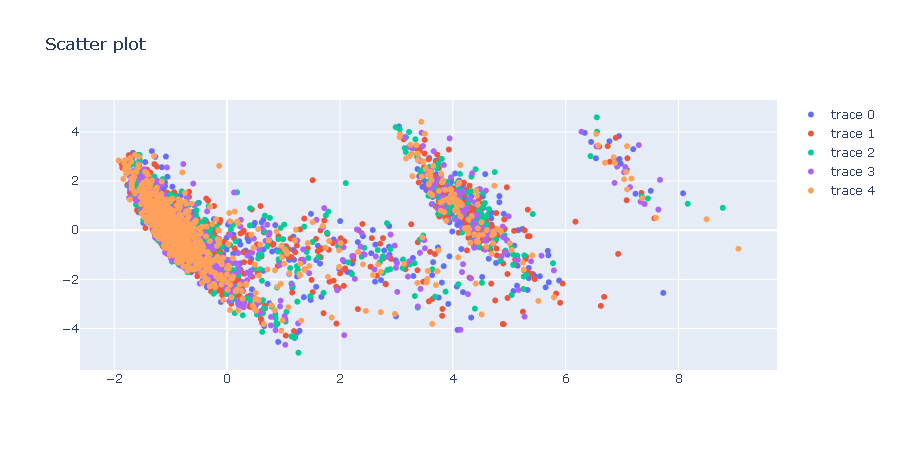

In [290]:
scatter_plot(pd.DataFrame(Y_sklearn).sample(5000))

In [165]:
cov_mat = np.cov(X_std.T)

In [304]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

#print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[3.96421682e+00 2.97259306e+00 1.61623571e+00 1.32233059e+00
 9.39164094e-01 8.52268065e-01 6.74775901e-01 6.09057834e-01
 5.78275898e-01 3.31769294e-01 1.20500251e-01 1.41357725e-02
 4.90015414e-03 1.29242057e-15]


In [167]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.9642168175067116
2.9725930638206854
1.6162357138730064
1.3223305862467207
0.9391640944838151
0.8522680651137569
0.6747759006806678
0.6090578339718863
0.5782758984243512
0.3317692937404825
0.1205002513209313
0.014135772535487355
0.004900154135791686
1.2924205709186397e-15


In [168]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 28.31538249,  49.54785121,  61.09220777,  70.53727549,
        77.24548339,  83.33301526,  88.1527662 ,  92.50310987,
        96.63358607,  99.00332892,  99.86403127,  99.96499946,
       100.        , 100.        ])

In [181]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(14,1), 
                      eig_pairs[1][1].reshape(14,1), 
                     eig_pairs[2][1].reshape(14,1)))

In [200]:
Y = X_std.dot(matrix_w)
#scatter_plot(pd.DataFrame(Y).sample(10000))

In [292]:
Y_sklearn

array([[-1.0371678 ,  2.36428106,  0.29859274,  4.        ],
       [-0.94541094,  2.46915575,  0.31941589,  4.        ],
       [ 3.57683788,  1.46609624,  1.49347155,  0.        ],
       ...,
       [-1.04782877,  2.92357751, -0.50328154,  1.        ],
       [-1.34107234,  1.56246144,  1.14135772,  3.        ],
       [-1.06729026,  0.39894772, -0.62562135,  1.        ]])